<a href="https://colab.research.google.com/github/pujaroy280/DATA602Assignment8/blob/main/Puja_Roy_08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

For this assignment, I am using the 50,000+ Indian Movies Data set from Kaggle: https://www.kaggle.com/datasets/nareshbhat/indian-moviesimdb. In addition, I am also combining the analysis for the previous dataset and using the Bollywood Movie Dataset from Kaggle: https://www.kaggle.com/datasets/mitesh58/bollywood-movie-dataset. I selected these datasets because I was raised watching Bollywood and indian movies throughout my childhood and it brings nostalgic vibes. Most importantly, I want to explore which movies and genres were popular back then. It would be cool to analyze the data by generating visualizations.


______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [1]:
import pandas as pd

# URL of the CSV file
# Fetch raw data from my GitHub profile
url = "https://raw.githubusercontent.com/pujaroy280/DATA602Assignment8/main/indian%20movies.csv"

# Load the data into a DataFrame
df = pd.read_csv(url)

In [2]:
# Display the first few rows of the DataFrame
print(df.head())

          ID              Movie Name  Year Timing(min) Rating(10)  Votes  \
0  tt0398974             Dr. Shaitan  1960           -          -      -   
1  tt1702558              Nadir Khan  1968           -          -      -   
2  tt0493437  Apna Sapna Money Money  2006     134 min        5.3  1,892   
3  tt0273405          Aag Aur Sholay  1987           -        2.2     20   
4  tt0049595                 Parivar  1956           -        7.4     21   

                                  Genre Language  
0                                     -    hindi  
1                                     -     urdu  
2  Comedy, Musical, Romance                hindi  
3                                     -     urdu  
4     Comedy, Drama, Family                hindi  


In [3]:
# Display columns
print(df.columns)

Index(['ID', 'Movie Name', 'Year', 'Timing(min)', 'Rating(10)', 'Votes',
       'Genre', 'Language'],
      dtype='object')


In [4]:
# Display summary statistics
print(df.describe())

           ID   Movie Name   Year Timing(min) Rating(10)  Votes  \
count   50602        50602  49041       50602      50602  50602   
unique  46106        42442    579         259         92   2951   
top         -   Alif Laila   2018           -          -      -   
freq     2508          167   1934       25892      26926  26925   

                    Genre Language  
count               50602    50602  
unique                718       19  
top     Drama                hindi  
freq                13529    14350  


In [5]:
# 2. Missing value information
missing_values = df.isnull().sum()
print("\nMissing Value Information:")
print(missing_values)


Missing Value Information:
ID                0
Movie Name        0
Year           1561
Timing(min)       0
Rating(10)        0
Votes             0
Genre             0
Language          0
dtype: int64


In [6]:
# 3. Other relevant information
print("\nNumber of Ratings:", df['Rating(10)'].nunique())
print("Number of Votes:", df['Votes'].nunique())
print("Number of Genre:", df['Genre'].nunique())


Number of Ratings: 92
Number of Votes: 2951
Number of Genre: 718


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [7]:
df.head()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi
1,tt1702558,Nadir Khan,1968,-,-,-,-,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20,-,urdu
4,tt0049595,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi


In [8]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Alternatively, you can remove columns with missing values by specifying axis=1
# df_cleaned = df.dropna(axis=1)

# Display the shape of the cleaned DataFrame to see the effect of removing missing values
print("Shape of original DataFrame:", df.shape)
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Shape of original DataFrame: (50602, 8)
Shape of cleaned DataFrame: (49041, 8)


In [9]:
df_cleaned.tail()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
50597,tt2784720,Sulagte Armaan,1984,-,-,-,Drama,hindi
50598,tt0315201,Aranya,1971,107 min,-,-,Drama,assamese
50599,tt0270221,Balayogini,1936,120 min,-,-,-,telugu
50600,tt0388697,Alajadi,1990,133 min,-,-,Drama,telugu
50601,tt14143738,KA-99 B-333,2009,-,-,-,Drama,kannada


In [10]:
# 8. Filter the data based on some condition
# Filter data in the Movie Name column to filter my favorite movie.
movie_name = df_cleaned[df_cleaned['Movie Name'] == 'Prem Qaidi']
movie_name

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
6832,tt0102706,Prem Qaidi,1991,156 min,2.2,137,"Action, Romance",hindi


In [11]:
# 8. Filter the data based on some condition
# Filter data in the Movie Name column to filter my favorite movie.
movie_name = df_cleaned[df_cleaned['Movie Name'] == 'Prema Khaidi']
movie_name

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
21633,tt0362045,Prema Khaidi,1990,-,6.6,22,Romance,telugu


In [12]:
# 8. Filter the data based on some condition
# Filter data in the Movie Name column to filter my favorite movie.
movie_name = df_cleaned[df_cleaned['Movie Name'] == 'Vishwatma']
movie_name

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
26705,tt0130350,Vishwatma,1992,174 min,6.5,"1,197","Action, Drama, Thriller",hindi


In [13]:
# 8. Filter the data based on some condition
# Filter data in the Movie Name column to filter my favorite movie.
movie_name = df_cleaned[df_cleaned['Movie Name'] == 'Tridev']
movie_name

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
10769,tt0100816,Tridev,1989,173 min,6.3,"1,846","Action, Crime, Drama",hindi
36136,tt11012266,Tridev,2016,156 min,-,-,Drama,bhojpuri


In [14]:
# 8. Filter the data based on some condition
# Filter data in the Movie Name column to filter my favorite movie.
movie_name = df_cleaned[df_cleaned['Movie Name'] == 'The Don']
movie_name

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
25769,tt0112884,The Don,1995,135 min,6.0,82,"Crime, Drama",hindi
50181,tt0867280,The Don,2006,133 min,4.2,135,"Action, Crime, Thriller",malayalam


In [15]:
# 8. Filter the data based on some condition
# Filter data in the Movie Name column to filter my favorite movie.
movie_name = df_cleaned[df_cleaned['Movie Name'] == 'Satya']
movie_name

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
5353,tt14531248,Satya,2018,-,-,-,Drama,marathi
24485,tt0195231,Satya,1998,170 min,8.2,"13,635","Action, Crime, Drama",hindi


In [16]:
# 8. Filter the data based on some condition
# Filter data in the Movie Name column to filter my favorite movie.
movie_name = df_cleaned[df_cleaned['Movie Name'] == 'Sadma']
movie_name

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
35912,tt9477036,Sadma,1948,-,-,-,Drama,hindi
35996,tt0086230,Sadma,1983,141 min,8.4,"2,967","Drama, Romance",hindi
44845,tt4814440,Sadma,1954,-,-,-,Drama,hindi


In [17]:
df_cleaned['Genre'].head(20)

0                                         -
1                                         -
2      Comedy, Musical, Romance            
3                                         -
4         Comedy, Drama, Family            
5                      Thriller            
6                         Drama            
7     Biography, Drama, History            
8                        Action            
9                         Drama            
10                       Comedy            
11                 Short, Music            
12           Biography, History            
13                                        -
14                                        -
15                        Drama            
16             Action, Thriller            
17                 Short, Music            
18                       Action            
19    Biography, Drama, History            
Name: Genre, dtype: object

In [18]:
# Step 1: Inspect unique values in the "Genre" column
unique_genres = df_cleaned['Genre'].unique()
print("Unique genres before cleaning:")
print(unique_genres)

Unique genres before cleaning:
['-' 'Comedy, Musical, Romance            '
 'Comedy, Drama, Family            ' 'Thriller            '
 'Drama            ' 'Biography, Drama, History            '
 'Action            ' 'Comedy            ' 'Short, Music            '
 'Biography, History            ' 'Action, Thriller            '
 'Comedy, Drama, Romance            ' 'Crime, Drama, Romance            '
 'Documentary            ' 'Romance            ' 'Horror            '
 'Action, Crime, Musical            ' 'Family, Romance            '
 'Action, Crime, Drama            ' 'Drama, Romance            '
 'Comedy, Drama            ' 'Action, Comedy, Fantasy            '
 'Musical            ' 'Drama, Musical            '
 'Short, Drama, Thriller            '
 'Action, Comedy, Mystery            ' 'Musical, Romance            '
 'Action, Comedy, Drama            ' 'Drama, Family, Fantasy            '
 'Action, Comedy            ' 'Action, Drama, Thriller            '
 'Drama, Musical, Roman

In [19]:
# Step 2: Clean the data by standardizing genre values
# For example, if "Comedy" and "comedy" are both present, we'll standardize them to "Comedy"
df_cleaned['Genre'] = df_cleaned['Genre'].str.capitalize()  # Capitalize first letter of each genre


<ipython-input-19-b21195fca0af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Genre'] = df_cleaned['Genre'].str.capitalize()  # Capitalize first letter of each genre


In [20]:
# Step 3: Count the occurrences of each genre after cleaning
genre_counts = df_cleaned['Genre'].value_counts()
print("\nGenre counts after cleaning:")
print(genre_counts)


Genre counts after cleaning:
Drama                                      12984
-                                           8478
Action                                      2378
Comedy                                      2036
Romance                                     1972
                                           ...  
Horror, crime, thriller                        1
Romance, thriller, war                         1
Adventure, fantasy, mystery                    1
Fantasy, horror, thriller                      1
Musical, action, crime                         1
Name: Genre, Length: 708, dtype: int64


In [21]:
# Remove the dash "-" from the genre column
df_cleaned['Genre'] = df_cleaned['Genre'].str.replace('-', '')
print(df_cleaned['Genre'])

0                                            
1                                            
2        Comedy, musical, romance            
3                                            
4           Comedy, drama, family            
                         ...                 
50597                       Drama            
50598                       Drama            
50599                                        
50600                       Drama            
50601                       Drama            
Name: Genre, Length: 49041, dtype: object


<ipython-input-21-5ea036bbfb16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Genre'] = df_cleaned['Genre'].str.replace('-', '')


In [22]:
df_cleaned['Genre'].value_counts().sort_values(ascending=False)

Drama                                   12984
                                         8478
Action                                   2378
Comedy                                   2036
Romance                                  1972
                                        ...  
Family, musical, comedy                     1
Animation, action, war                      1
Realitytv, sport                            1
Short, fantasy, thriller                    1
Musical, action, crime                      1
Name: Genre, Length: 708, dtype: int64

### **Extracting Genres from each Movie**

In [23]:
# Step 1: Remove rows with empty genre values
df_cleaned = df_cleaned[df_cleaned['Genre'].str.strip() != '']

In [24]:
# Step 2: Remove extra spaces from the Genre column
df_cleaned['Genre'] = df_cleaned['Genre'].str.strip()

<ipython-input-24-7921853cb4e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Genre'] = df_cleaned['Genre'].str.strip()


In [25]:
# Step 3: Split combined genres separated by commas into individual genres
df_cleaned['Genre'] = df_cleaned['Genre'].str.split(',')

<ipython-input-25-7f01ef19bdb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Genre'] = df_cleaned['Genre'].str.split(',')


In [26]:
# Step 4 & 5: Capitalize the first letter of each genre and remove leading spaces
df_cleaned['Genre'] = df_cleaned['Genre'].apply(lambda x: [genre.strip().capitalize() for genre in x])

In [27]:
# Step 6: Explode the Genre column to create multiple rows for each movie, each with a single genre
df_exploded = df_cleaned.explode('Genre')

In [28]:
# Step 7: Count the occurrences of each genre
genre_counts = df_exploded['Genre'].value_counts()

In [29]:
# Step 8: Sort the genre counts in descending order
genre_counts_sorted = genre_counts.sort_values(ascending=False)

In [30]:
# Print the sorted genre counts
print(genre_counts_sorted)

Drama          24020
Action          7577
Romance         6562
Comedy          6361
Thriller        3910
Crime           2635
Family          2366
Short           1724
Musical         1561
Adventure       1287
Mystery         1109
Horror          1050
Fantasy         1029
History          609
Documentary      588
Biography        517
Music            465
Animation        288
Sport            177
War              172
Scifi            156
Realitytv         64
Talkshow          64
News              32
Gameshow          28
Western            7
Name: Genre, dtype: int64


### **Analyzing Languages of Indian Movies**

In [31]:
df_cleaned['Language'].value_counts().sort_values(ascending=False)

hindi        12115
telugu        4379
tamil         4364
malayalam     4105
bengali       3959
urdu          2751
kannada       2493
marathi       1814
punjabi       1193
nepali         933
oriya          821
gujarati       522
bhojpuri       453
assamese       402
rajastani       95
sanskrit        47
kashmiri        42
konkani         42
tulu            33
Name: Language, dtype: int64

In [32]:
# Assuming df_cleaned['Language'] is the Series containing languages
df_cleaned['Language'] = df_cleaned['Language'].str.title()

# Now, you can print the value counts sorted in descending order
print(df_cleaned['Language'].value_counts().sort_values(ascending=False))

Hindi        12115
Telugu        4379
Tamil         4364
Malayalam     4105
Bengali       3959
Urdu          2751
Kannada       2493
Marathi       1814
Punjabi       1193
Nepali         933
Oriya          821
Gujarati       522
Bhojpuri       453
Assamese       402
Rajastani       95
Sanskrit        47
Kashmiri        42
Konkani         42
Tulu            33
Name: Language, dtype: int64


### **Analyzing Ratings of Movies**

In [33]:
df_cleaned['Rating(10)'].value_counts().sort_values(ascending=False)

-      18532
7.2      737
6.8      706
7.1      689
6.5      646
       ...  
1.0        3
1.8        3
1.3        2
1.2        2
1.1        2
Name: Rating(10), Length: 92, dtype: int64

In [34]:
# Assuming df_cleaned['Rating(10)'] is the Series containing ratings
# Remove rows with dash values
df_cleaned = df_cleaned[df_cleaned['Rating(10)'] != '-']
df_cleaned

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","[Comedy, Musical, Romance]",Hindi
4,tt0049595,Parivar,1956,-,7.4,21,"[Comedy, Drama, Family]",Hindi
6,tt6597160,Jacqueline I Am Coming,2019,112 min,7.9,16,[Drama],Hindi
7,tt0829459,A Mighty Heart,2007,108 min,6.6,"26,885","[Biography, Drama, History]",Urdu
9,tt0364628,Raktalekha,1992,175 min,6.3,12,[Drama],Bengali
...,...,...,...,...,...,...,...,...
50586,tt9277948,Akshara,2021,136 min,6.5,90,[Thriller],Telugu
50587,tt0231191,Atal Jaler Ahwan,1962,-,6.6,14,[Drama],Bengali
50592,tt6836936,Saaho,2019,170 min,5.2,"16,102","[Action, Thriller]",Telugu
50594,tt0073191,Jai Santoshi Maa,1975,145 min,6.3,114,"[Drama, Fantasy]",Hindi


In [35]:
df_cleaned['Rating(10)'].value_counts().sort_values(ascending=False)

7.2    737
6.8    706
7.1    689
6.5    646
7.0    642
      ... 
1.0      3
1.8      3
1.3      2
1.2      2
1.1      2
Name: Rating(10), Length: 91, dtype: int64

### **Analyzing Bollywood Actors Data**

In [36]:
# URL of the CSV file
# Fetch raw data from my GitHub profile
url = "https://raw.githubusercontent.com/pujaroy280/DATA602Assignment8/main/BollywoodActorRanking.csv"

# Load the data into a DataFrame
df2 = pd.read_csv(url)

In [37]:
# Display the first few rows of the DataFrame
print(df2.head())

   actorId         actorName  movieCount  ratingSum  normalizedMovieRank  \
0      373        Aamir Khan          11       1170              9.44862   
1      374    Shah Rukh Khan          23       2000              7.55009   
2      375       Salman Khan          36       2340              5.40217   
3      376      Katrina Kaif          17       1640              8.48082   
4      377  Deepika Padukone          16       1080              5.64674   

   googleHits  normalizedGoogleRank  normalizedRating  
0     2460000               7.34283          10.00000  
1     2670000               7.88458           9.22674  
2     3490000              10.00000           9.20821  
3     2120000               6.46570           8.94852  
4     3000000               8.73591           8.62716  


In [38]:
# Display columns
print(df2.columns)

Index(['actorId', 'actorName', 'movieCount', 'ratingSum',
       'normalizedMovieRank', 'googleHits', 'normalizedGoogleRank',
       'normalizedRating'],
      dtype='object')


In [39]:
# Display summary statistics
print(df2.describe())

          actorId  movieCount    ratingSum  normalizedMovieRank    googleHits  \
count  301.000000  301.000000   301.000000           299.000000  3.010000e+02   
mean   523.000000   10.232558   419.136213             2.768970  3.741886e+05   
std     87.035433    8.508764   446.972689             1.626970  6.647169e+05   
min    373.000000    0.000000     0.000000             1.000000  0.000000e+00   
25%    448.000000    5.000000   140.000000             1.489130  0.000000e+00   
50%    523.000000    7.000000   260.000000             2.369570  7.640000e+04   
75%    598.000000   12.000000   500.000000             3.621045  3.850000e+05   
max    673.000000   54.000000  2950.000000            10.000000  3.490000e+06   

       normalizedGoogleRank  normalizedRating  
count            189.000000        301.000000  
mean               2.533937          2.933339  
std                1.951501          1.747883  
min                1.000000          1.000000  
25%                1.242680   

In [40]:
# 2. Missing value information
missing_values = df2.isnull().sum()
print("\nMissing Value Information:")
print(missing_values)


Missing Value Information:
actorId                   0
actorName                 0
movieCount                0
ratingSum                 0
normalizedMovieRank       2
googleHits                0
normalizedGoogleRank    112
normalizedRating          0
dtype: int64


In [41]:
# 3. Other relevant information
print("\nNumber of Actors Names:", df2['actorName'].nunique())
print("Number of Movies:", df2['movieCount'].nunique())
print("Number of Rating:", df2['ratingSum'].nunique())


Number of Actors Names: 301
Number of Movies: 36
Number of Rating: 96


In [42]:
df2.head()

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,373,Aamir Khan,11,1170,9.44862,2460000,7.34283,10.00000
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,7.88458,9.22674
2,375,Salman Khan,36,2340,5.40217,3490000,10.00000,9.20821
3,376,Katrina Kaif,17,1640,8.48082,2120000,6.46570,8.94852
4,377,Deepika Padukone,16,1080,5.64674,3000000,8.73591,8.62716


In [43]:
# Drop a column named 'actorId'
df2 = df2.drop(columns=['actorId'])

# Display the first few rows of the DataFrame
print(df2.head())

          actorName  movieCount  ratingSum  normalizedMovieRank  googleHits  \
0        Aamir Khan          11       1170              9.44862     2460000   
1    Shah Rukh Khan          23       2000              7.55009     2670000   
2       Salman Khan          36       2340              5.40217     3490000   
3      Katrina Kaif          17       1640              8.48082     2120000   
4  Deepika Padukone          16       1080              5.64674     3000000   

   normalizedGoogleRank  normalizedRating  
0               7.34283          10.00000  
1               7.88458           9.22674  
2              10.00000           9.20821  
3               6.46570           8.94852  
4               8.73591           8.62716  


In [44]:
# 1. Modify multiple column names
df2.rename(columns={'actorName': 'Actor','ratingSum': 'Rating'}, inplace=True)
df2.head(10)

,Actor,movieCount,Rating,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,Aamir Khan,11,1170,9.44862,2460000,7.34283,10.00000
1,Shah Rukh Khan,23,2000,7.55009,2670000,7.88458,9.22674
2,Salman Khan,36,2340,5.40217,3490000,10.00000,9.20821
3,Katrina Kaif,17,1640,8.48082,2120000,6.46570,8.94852
4,Deepika Padukone,16,1080,5.64674,3000000,8.73591,8.62716
5,Hrithik Roshan,16,1120,5.89130,2650000,7.83298,8.25194
6,Priyanka Chopra,36,1990,4.45109,3130000,9.07128,8.13686
7,Kareena Kapoor,37,2200,4.86016,2940000,8.58112,8.09065
8,Ranbir Kapoor,11,890,6.95850,1860000,5.79496,7.69864
9,Kajol,6,450,6.38043,1780000,5.58858,7.25156


In [45]:
# Remove rows with missing values
df2_cleaned = df2.dropna()

# Display the shape of the cleaned DataFrame to see the effect of removing missing values
print("Shape of original DataFrame:", df2.shape)
print("Shape of cleaned DataFrame:", df2_cleaned.shape)

Shape of original DataFrame: (301, 7)
Shape of cleaned DataFrame: (189, 7)


In [46]:
# 7. Sort the data based on multiple variables
df2_cleaned = df2_cleaned.sort_values(by=['movieCount', 'Rating'], ascending=[False, False])
df2_cleaned

,Actor,movieCount,Rating,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
18,Akshay Kumar,54,2950,4.38768,1960000,6.05294,6.38048
14,Ajay Devgn,49,2320,3.67524,2570000,7.62660,6.87132
11,Amitabh Bachchan,48,2140,3.40489,2770000,8.14256,7.01130
36,Sanjay Dutt,43,1740,3.00202,1560000,5.02103,5.00264
83,Sunil Shetty,42,1530,2.60714,560000,2.44125,3.30729
...,...,...,...,...,...,...,...
145,Rana Jung Bahadur,5,180,2.56522,38100,1.09486,2.51605
171,Laxmikant Berde,5,160,2.17391,29100,1.07164,2.27981
204,Aarti Chhabria,5,120,1.39130,116000,1.29582,1.96154
230,Ishrat Ali,5,100,1.00000,68100,1.17225,1.66810


In [47]:
# 8. Filter the data based on some condition
# Filter data in the actor column to observe how many movies she was casted in.
actor_name = df2_cleaned[df2_cleaned['Actor'] == 'Karisma Kapoor']
actor_name

,Actor,movieCount,Rating,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
69,Karisma Kapoor,6,150,1.48913,1260000,4.24709,3.69931


In [48]:
actor_name = df2_cleaned[df2_cleaned['Actor'] == 'Sunny Deol']
actor_name

,Actor,movieCount,Rating,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
79,Sunny Deol,25,860,2.4087,687000,2.76888,3.38092


In [49]:
actor_name = df2_cleaned[df2_cleaned['Actor'] == 'Madhavan']
actor_name

,Actor,movieCount,Rating,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
35,Madhavan,12,630,4.17935,1140000,3.93752,5.05611


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.


### **PART 1 Matplotlib DATA VISUALIZATIONS:**

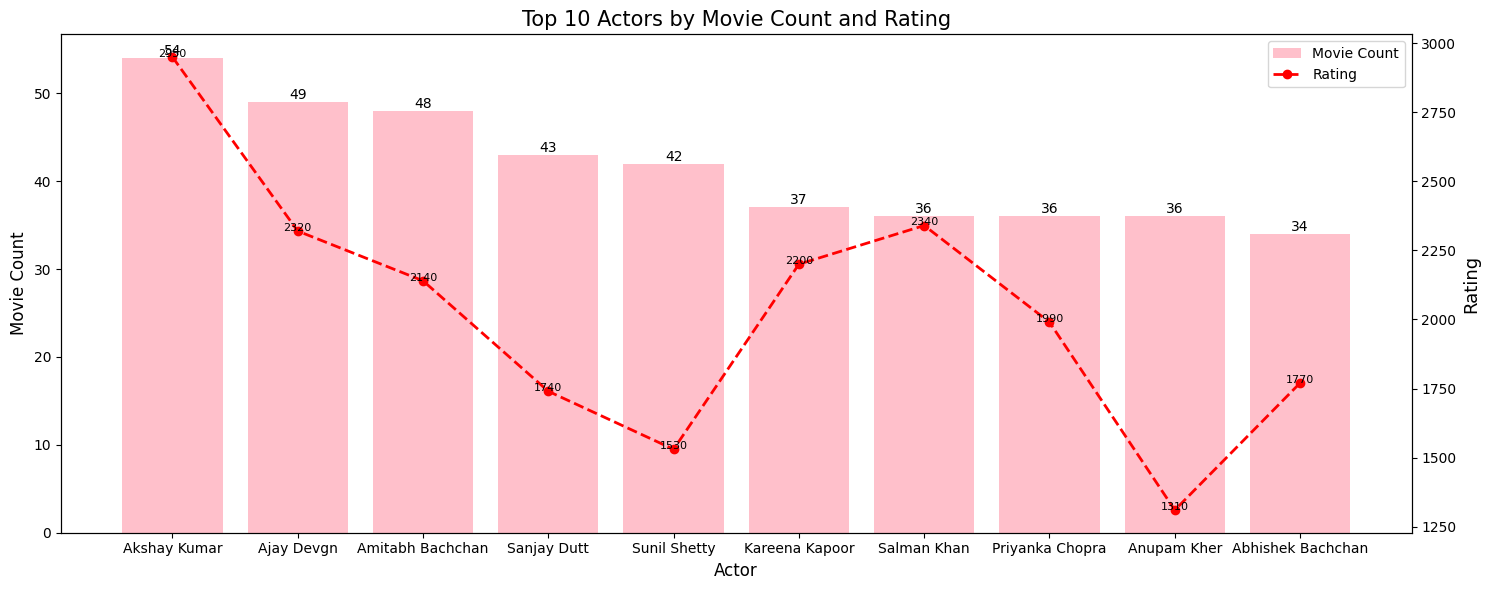

In [50]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'movieCount' in descending order
df2_sorted = df2_cleaned.sort_values(by='movieCount', ascending=False)

# Select top 10 actors
top_10_actors = df2_sorted.head(10)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting the bar plot for movie count
bars = ax.bar(top_10_actors['Actor'], top_10_actors['movieCount'], color='pink', label='Movie Count')
ax.set_ylabel('Movie Count', fontsize=12)
ax.set_xlabel('Actor', fontsize=12)
ax.set_title('Top 10 Actors by Movie Count and Rating', fontsize=15)

# Add value counts on top of each bar
for bar, count in zip(bars, top_10_actors['movieCount']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{count}',
            ha='center', va='bottom', color='black')

# Twin the x-axis to create a secondary y-axis for 'Rating'
ax2 = ax.twinx()
ax2.plot(top_10_actors['Actor'], top_10_actors['Rating'], color='red', linestyle='--', marker='o', linewidth=2, label='Rating')
ax2.set_ylabel('Rating', fontsize=13)

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=10)  # Combine legends and place outside the plot

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations for ratings
for i, rating in enumerate(top_10_actors['Rating']):
    ax2.annotate(str(rating), xy=(i, rating), xytext=(i, rating + 0.1), ha='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()


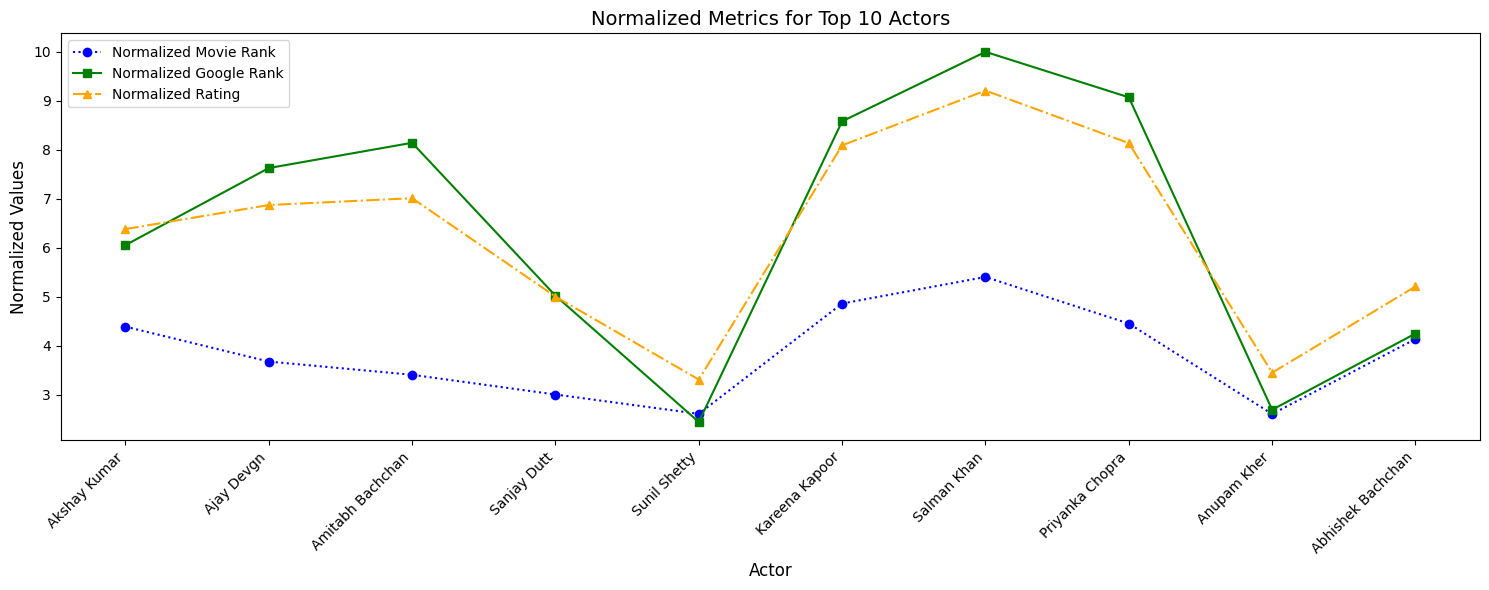

In [51]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'movieCount' in descending order
df2_sorted = df2_cleaned.sort_values(by='movieCount', ascending=False)

# Select top 10 actors
top_10_actors = df2_sorted.head(10)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting the normalizedMovieRank for top 10 actors
ax.plot(top_10_actors['Actor'], top_10_actors['normalizedMovieRank'], color='blue', linestyle='dotted', marker='o', label='Normalized Movie Rank')
ax.plot(top_10_actors['Actor'], top_10_actors['normalizedGoogleRank'], color='green', marker='s', label='Normalized Google Rank')
ax.plot(top_10_actors['Actor'], top_10_actors['normalizedRating'], color='orange', linestyle='dashdot', marker='^', label='Normalized Rating')

# Set labels and title
ax.set_ylabel('Normalized Values', fontsize=12)
ax.set_xlabel('Actor', fontsize=12)
ax.set_title('Normalized Metrics for Top 10 Actors', fontsize=14)

# Add legend
ax.legend(loc='upper left', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

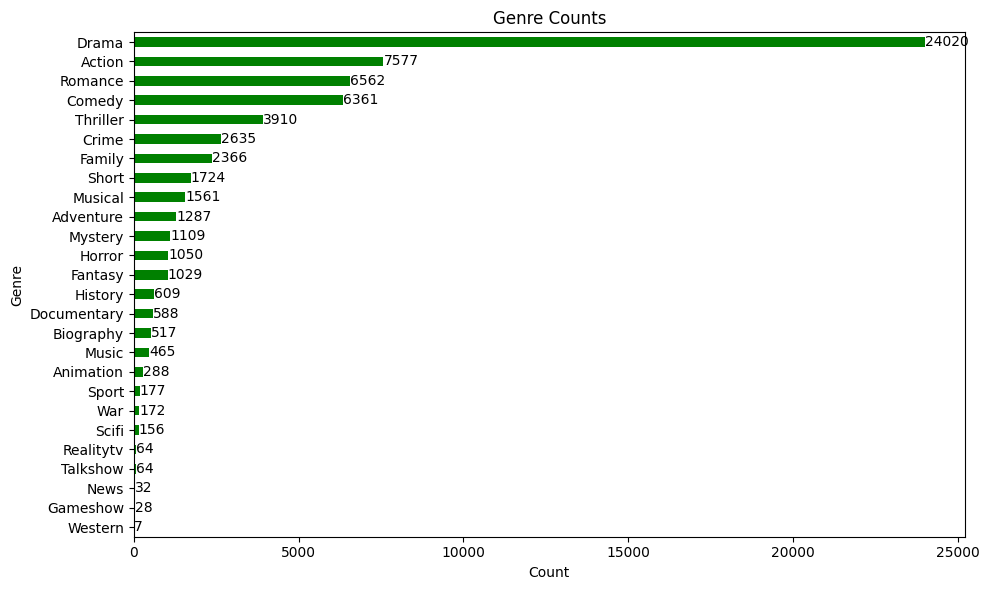

In [52]:
import matplotlib.pyplot as plt

# genre_counts_sorted is already calculated

# Plotting
plt.figure(figsize=(10, 6))
genre_counts_sorted = genre_counts_sorted.sort_values(ascending=True)  # Sort in descending order
bars = genre_counts_sorted.plot(kind='barh', color='green')

# Add value counts on top of each bar
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             ha='left', va='center', color='black')

plt.title('Genre Counts')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()

# Display the plot
plt.show()

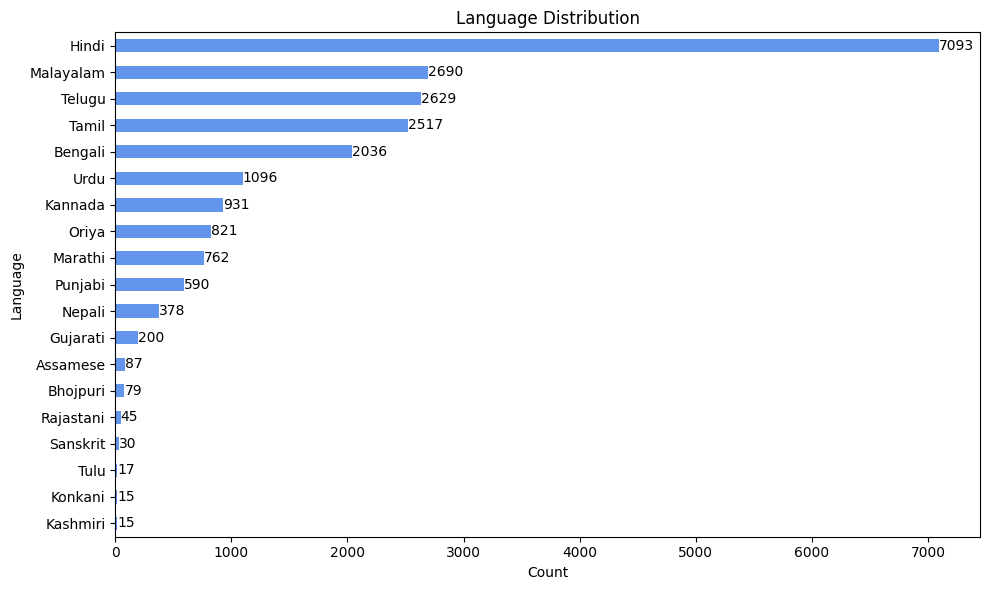

In [53]:
import matplotlib.pyplot as plt

language_counts = df_cleaned['Language'].value_counts().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
bars = language_counts.plot(kind='barh', color='cornflowerblue')

# Add value counts on top of each bar
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             ha='left', va='center', color='black')

plt.title('Language Distribution')
plt.xlabel('Count')
plt.ylabel('Language')
plt.tight_layout()

# Display the plot
plt.show()


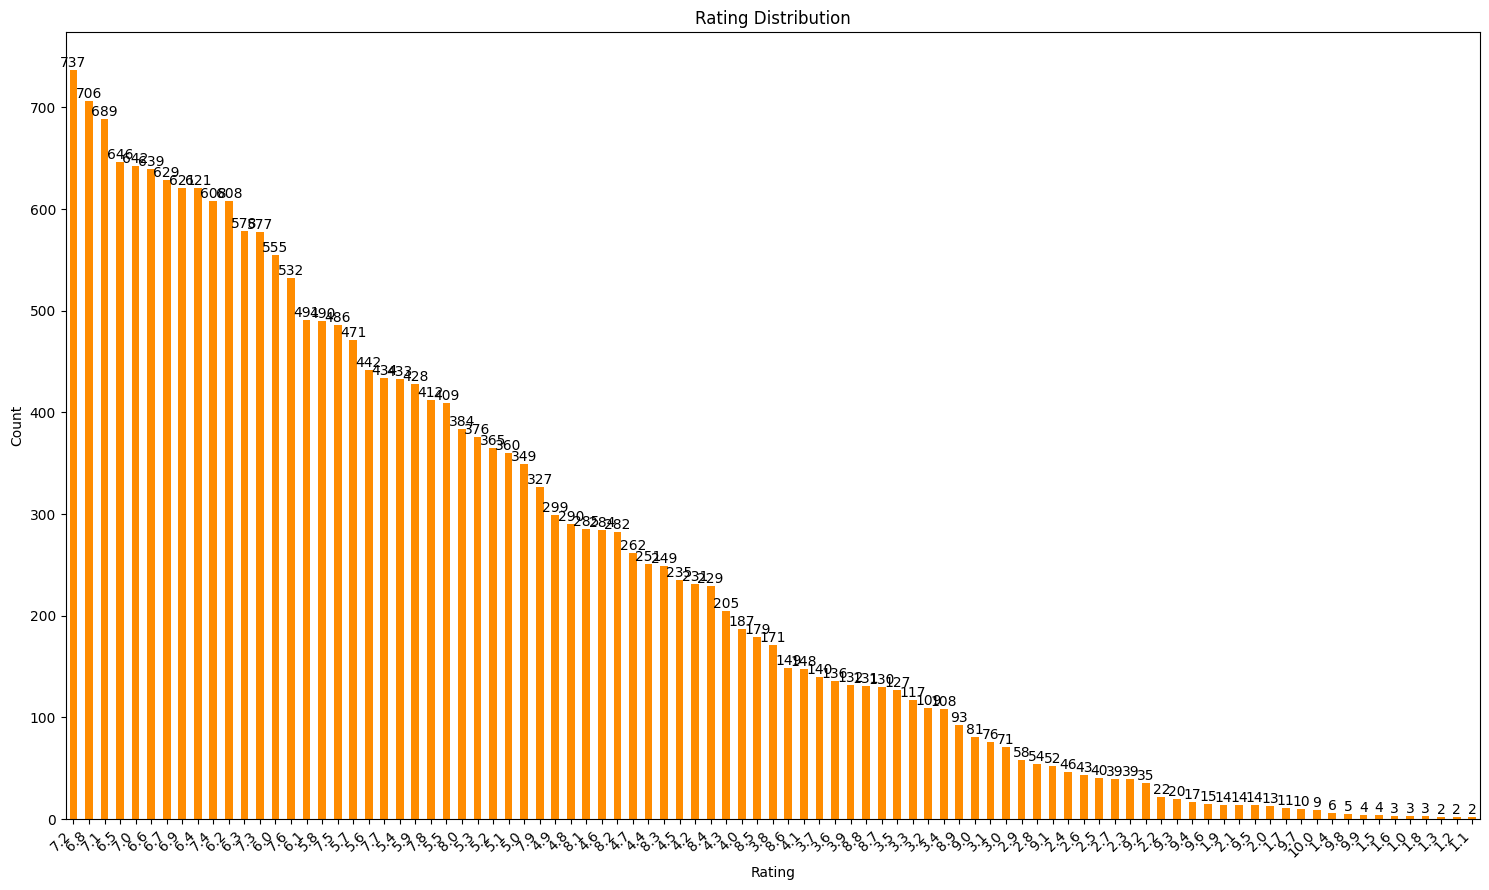

In [54]:
# Plotting
plt.figure(figsize=(15, 9))
rating_counts = df_cleaned['Rating(10)'].value_counts().sort_values(ascending=False)
bars = rating_counts.plot(kind='bar', color='darkorange')

# Add value counts on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom', color='black')

plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

### **PART 2: Seaborn DATA VISUALIZATIONS**

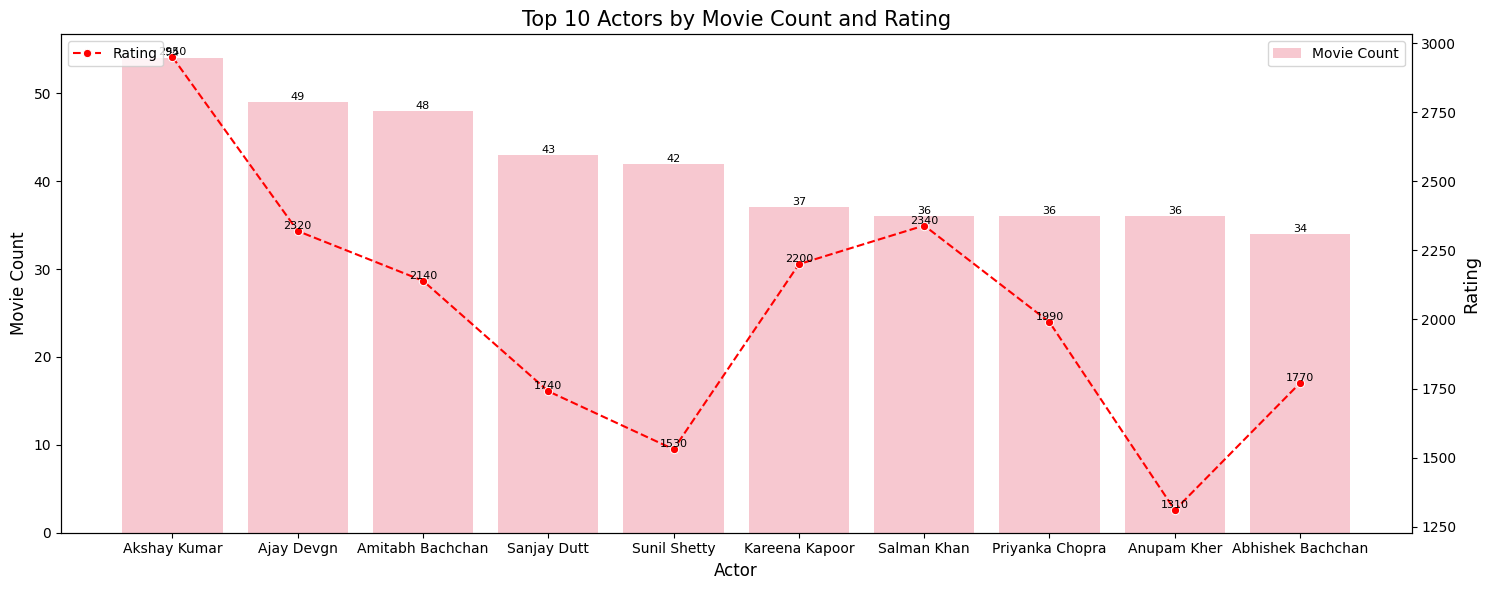

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'movieCount' in descending order
df2_sorted = df2_cleaned.sort_values(by='movieCount', ascending=False)

# Select top 10 actors
top_10_actors = df2_sorted.head(10)

# Create a figure and axis
plt.figure(figsize=(15, 6))

# Plotting the bar plot for movie count using Seaborn
sns.barplot(x=top_10_actors['Actor'], y=top_10_actors['movieCount'], color='pink', label='Movie Count')

# Add value counts on top of each bar
for i, count in enumerate(top_10_actors['movieCount']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8, color='black')

# Set labels and title
plt.ylabel('Movie Count', fontsize=12)
plt.xlabel('Actor', fontsize=12)
plt.title('Top 10 Actors by Movie Count and Rating', fontsize=15)

# Create a secondary y-axis for 'Rating' and plot it using Seaborn
ax2 = plt.twinx()
sns.lineplot(x=top_10_actors['Actor'], y=top_10_actors['Rating'], color='red', linestyle='--', marker='o', label='Rating', ax=ax2)

# Set secondary y-axis label
ax2.set_ylabel('Rating', fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations for ratings
for i, rating in enumerate(top_10_actors['Rating']):
    plt.text(i, rating, str(rating), ha='center', va='bottom', fontsize=8, color='black')

# Add legend
plt.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()



*   I used Seaborn's barplot() to create the bar plot for movie count and lineplot() to create the line plot for ratings.

*   Value counts are added on top of each bar using plt.text().

*   Labels and title are set using plt.ylabel(), plt.xlabel(), and plt.title().
*   A secondary y-axis is created for 'Rating' using plt.twinx() and ax2.set_ylabel().


*  X-axis labels are rotated for better readability with plt.xticks().


*  Annotations for ratings are added using plt.text().


*   Legends are added using plt.legend().
*   The properties showcased include bar plot, line plot, annotations, multiple axes, and legends.

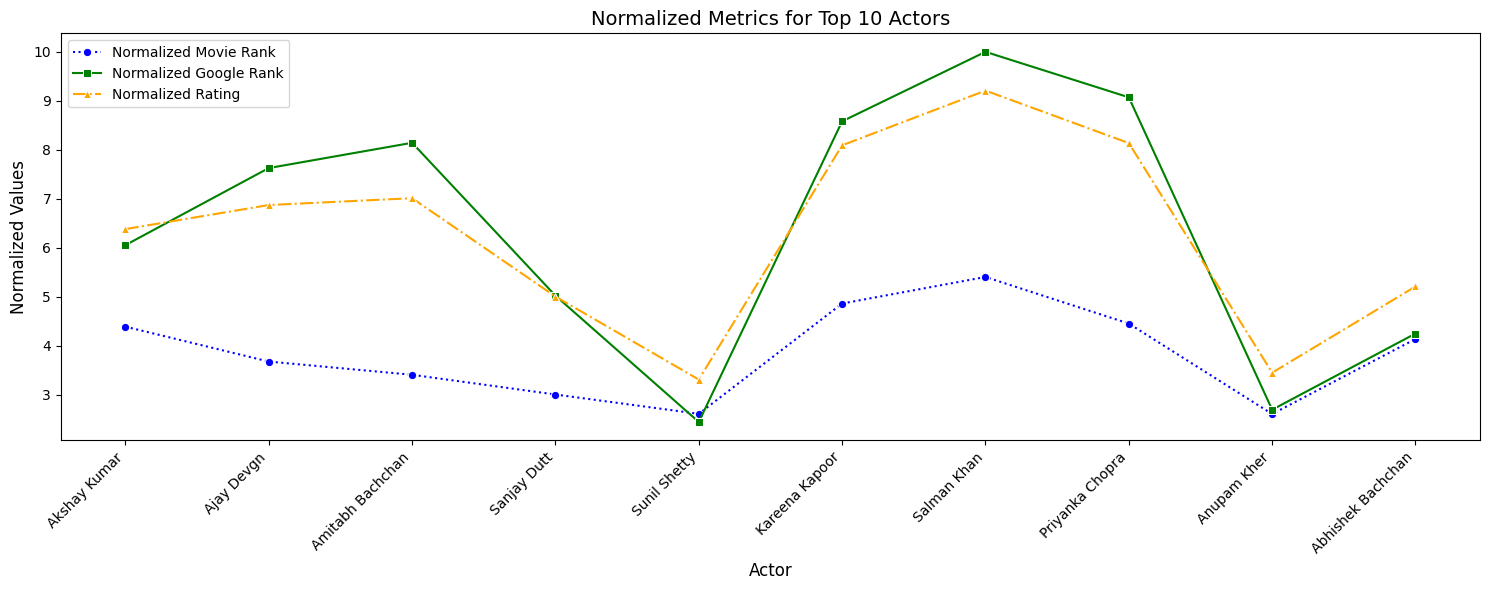

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'movieCount' in descending order
df2_sorted = df2_cleaned.sort_values(by='movieCount', ascending=False)

# Select top 10 actors
top_10_actors = df2_sorted.head(10)

# Create a figure and axis
plt.figure(figsize=(15, 6))

# Plotting the normalizedMovieRank for top 10 actors using Seaborn
sns.lineplot(x=top_10_actors['Actor'], y=top_10_actors['normalizedMovieRank'], color='blue', linestyle='dotted', marker='o', label='Normalized Movie Rank')

# Plotting the normalizedGoogleRank for top 10 actors using Seaborn
sns.lineplot(x=top_10_actors['Actor'], y=top_10_actors['normalizedGoogleRank'], color='green', marker='s', label='Normalized Google Rank')

# Plotting the normalizedRating for top 10 actors using Seaborn
sns.lineplot(x=top_10_actors['Actor'], y=top_10_actors['normalizedRating'], color='orange', linestyle='dashdot', marker='^', label='Normalized Rating')

# Set labels and title
plt.ylabel('Normalized Values', fontsize=12)
plt.xlabel('Actor', fontsize=12)
plt.title('Normalized Metrics for Top 10 Actors', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add combined legend
plt.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

*   In this plot, I used Seaborn's lineplot() to create line plots for each normalized metric ('normalizedMovieRank', 'normalizedGoogleRank', 'normalizedRating') for the top 10 actors.
*  Labels and title are set using plt.ylabel(), plt.xlabel(), and plt.title().
*  X-axis labels are rotated for better readability with plt.xticks().
*  A combined legend is added using plt.legend().






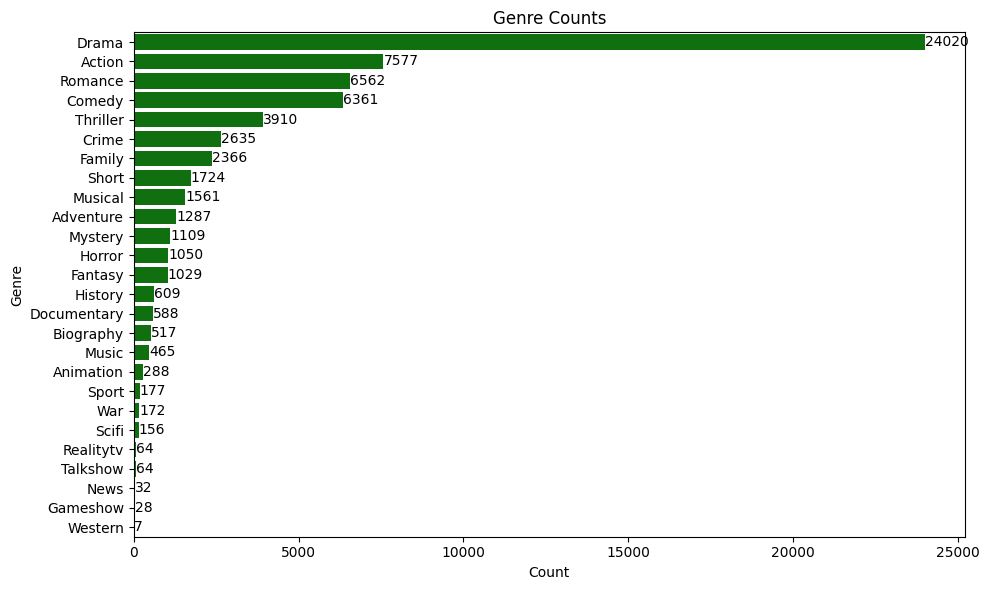

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# genre_counts_sorted is already calculated

# Sort the genre counts in ascending order
genre_counts_sorted = genre_counts_sorted.sort_values(ascending=False)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plotting the horizontal bar plot using Seaborn
bars = sns.barplot(x=genre_counts_sorted, y=genre_counts_sorted.index, color='green')

# Add value counts on top of each bar
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             ha='left', va='center', color='black')

# Set labels and title
plt.title('Genre Counts')
plt.xlabel('Count')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()



* In this plot, I used Seaborn's barplot() to create a horizontal bar plot based on Genre counts of 50,000+ Indian Movies from the Kaggle Data set.
* Annotations displaying value counts are added on top of each bar using plt.text().
* Labels and title are set using plt.title(), plt.xlabel(), and plt.ylabel().
* The plot is displayed using plt.show().



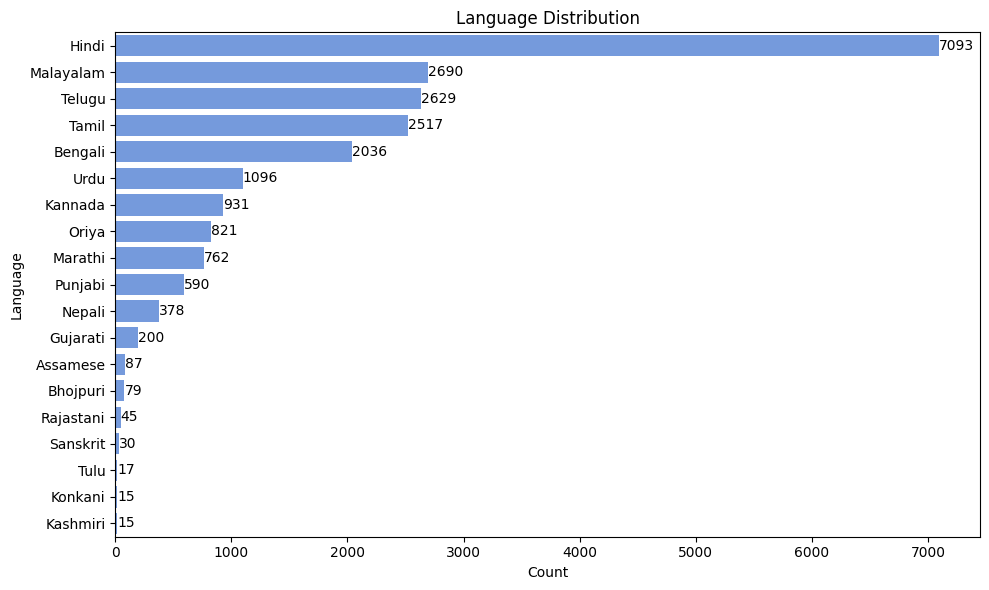

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

language_counts = df_cleaned['Language'].value_counts().sort_values(ascending=False)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plotting the horizontal bar plot using Seaborn
bars = sns.barplot(x=language_counts, y=language_counts.index, color='cornflowerblue')

# Add value counts on top of each bar
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             ha='left', va='center', color='black')

# Set labels and title
plt.title('Language Distribution')
plt.xlabel('Count')
plt.ylabel('Language')

plt.tight_layout()
plt.show()

* In this plot, I used Seaborn's barplot() to create a horizontal bar plot based on the language distribution on indian movies.
* Annotations displaying value counts are added on top of each bar using plt.text().
* Labels and title are set using plt.title(), plt.xlabel(), and plt.ylabel().
* The plot is displayed using plt.show().

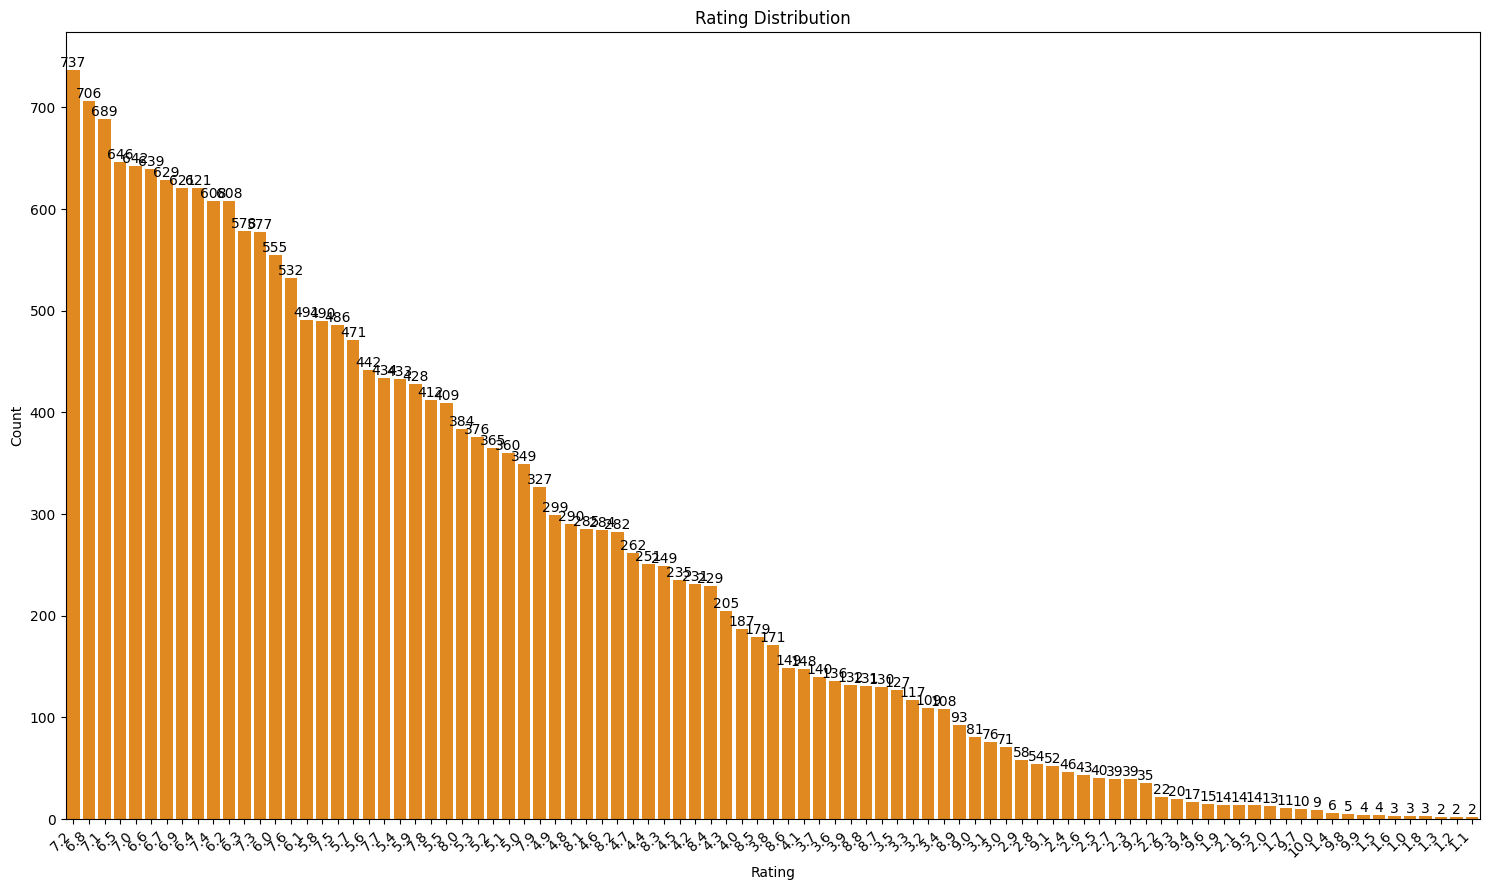

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(15, 9))
rating_counts = df_cleaned['Rating(10)'].value_counts().sort_values(ascending=False)
bars = sns.barplot(x=rating_counts.index, y=rating_counts, color='darkorange')

# Add value counts on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom', color='black')

plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

* In this plot, I used Seaborn's barplot() to create a vertical bar plot to observe the rating distribution counts in descending order of indian movies.
* Annotations displaying value counts are added on top of each bar using plt.text().
* Labels and title are set using plt.title(), plt.xlabel(), and plt.ylabel().
* The plot is displayed using plt.show().

### **Part 3: Matplotlib Vs. Seaborn**

Below are differences between creating plots in Matplotlib and Seaborn:



*   **Ease of use:** Matplotlib requires more code to create basic plots compared to Seaborn, which offers a higher-level interface for creating attractive statistical graphics with less code.
*   **Aesthetics:** Seaborn contains better default color palettes compared to Matplotlib. Seaborn typically has better color schemes, grid lines, and font sizes out of the box.
* **Plotting functions of the Library:** When using Seaborn to generate visualizations, you have to use the functions: sns.barplot() and sns.lineplot(), which automatically handle aggregation and summarization of data. On the other hand, Matplotlib offers more plotting functions like plt.plot() and plt.bar(), which require more manual data manipulation.
* **Data Handling:** Seaborn operates seamlessly with Pandas DataFrame making it easier to visualize data directly without excessive data manipulation. In contrast, Matplotlib is versatile with working with Pandas DataFrame but may require more manual data processing.
* **Default Styles & Themes:** Seaborn comprises of built-in themes and styles that can be easily applied to plots using sns.set_style() and sns.set_theme(), providing consistent and visually appealing plots. Matplotlib, on the other hand, requires more manual customization to achieve similar visual effects.
* **Statistical Visualization:** Seaborn provides high-level functions for statistical visualization, such as distribution plots (sns.histplot()), categorical plots (sns.boxplot()), and relational plots (sns.scatterplot()), which can automatically handle summarization and aggregation of data. Matplotlib can also create similar plots, but requires more manual data manipulation.




# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

In conclusion, my exploration into the world of Indian cinema has unveiled fascinating insights. The top 10 genres dominating the Indian movie landscape include Drama, Action, Romance, Comedy, Thriller, Crime, Family, Short, Musical, and Adventure, highlighting the diverse tastes of audiences. Moreover, the language distribution among Indian movies reveals Hindi, Malayalam, Telugu, Tamil, Bengali, Urdu, Kannada, Oriya, Marathi, and Punjabi as the most prevalent languages, showcasing the rich linguistic tapestry of Indian cinema.

Delving deeper into movie ratings, I found that 7.2 emerged as the most common rating among the diverse spectrum of ratings. However, the allure of Indian cinema extends beyond mere statistics, with notable actors leaving an indelible mark on the industry. Notably, Akshay Kumar stands out among the top 10 actors, not only for his prolific filmography but also for consistently garnering higher ratings compared to his peers.

Additionally, my analysis sheds light on Salman Khan's prominence, with his movies boasting higher normalized metrics based on ratings and rankings, affirming his enduring appeal to audiences. However, amidst the glitz and glamour, individual movie ratings offer intriguing narratives. Take, for instance, the Hindi version of "Prem Qaidi," which garnered a modest rating of 2.2 out of 10 but attracted a significant number of votes, demonstrating its polarizing effect on viewers. Conversely, the Telugu version, "Prema Khaidi," fared better with a rating of 6.6 out of 10, albeit with fewer votes, showcasing the nuances of audience preferences.

Throughout my exploration, I found Seaborn to be a valuable tool for generating visualizations, offering simplicity and clarity in depicting complex data patterns. Moreover, juxtaposing Seaborn with Matplotlib underscored the distinct functionalities each package brings to the table, providing valuable insights into the diverse visualization landscape.

In essence, my journey through the intricacies of Indian cinema not only unveiled captivating trends and patterns but also underscored the multifaceted nature of storytelling that continues to captivate audiences worldwide.